In [7]:
import os
import sys
from dotenv import load_dotenv
load_dotenv(override=True)
sys.path.append(os.environ["WORKING_DIR"])
from os.path import join
import json
import pandas as pd
from sklearn.metrics import classification_report
import glob
import matplotlib.pyplot as plt
import numpy as np

/home/sanonymous/.local/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## joined n grouped EMD

In [2]:
labeled_data_size = 5
max_group_size = 3
table_frac = None

true_types = []
predicted_types = []
total_numeric_cols_to_predict = 0

for index, rank_file in enumerate(glob.glob(join("joined_n_grouped_EMD", "results", f"*[!appr]?_{max_group_size}_{table_frac}_{labeled_data_size}_absolute_20.0_2.csv"))):
    # if index > 1:
    #     break
    #print(rank_file)
    total_numeric_cols_to_predict += 1 
    df_ranked_EMD = pd.read_csv(rank_file)
    if len(df_ranked_EMD) > 0:
        true_types.append(df_ranked_EMD.iloc[0]["real_semantic_type"])
        predicted_types.append(df_ranked_EMD.iloc[0]["semantic_type"])
        # if df_ranked_EMD.iloc[0]["semantic_type"] == "TB":
        #     print(rank_file)
print(len(true_types))
class_report = classification_report(true_types, predicted_types, zero_division=0)


70


In [3]:
print(class_report)

              precision    recall  f1-score   support

          AB       0.80      0.80      0.80         5
          BB       1.00      0.25      0.40         4
          CS       0.15      0.67      0.25         3
        GIDP       0.29      0.50      0.36         4
           H       0.00      0.00      0.00         4
         HBP       0.06      0.17      0.09         6
          HR       0.00      0.00      0.00         5
           R       0.00      0.00      0.00         2
          SB       1.00      1.00      1.00         1
          SF       0.00      0.00      0.00         4
          SH       1.00      0.67      0.80         6
          SO       0.00      0.00      0.00         3
          TB       1.00      0.40      0.57         5
         X1B       0.00      0.00      0.00         4
         X2B       0.50      0.25      0.33         4
         X3B       0.18      0.50      0.26         6
         iBB       0.00      0.00      0.00         4

    accuracy              

## joined n groupes EMD with correlation

In [56]:
labeled_data_size = 5
max_group_size = 10
approach = 6
table_frac = None

true_types = []
predicted_types = []
total_numeric_cols_to_predict = 0
EMD_threshold_factor = 0.01


results_jng_emd = []
for index, rank_file in enumerate(glob.glob(join("joined_n_grouped_EMD", "results", f"*appr{approach}_{max_group_size}_{table_frac}_{labeled_data_size}_absolute_20.0_2.csv"))):
    # if index > 1:
    #     break
    total_numeric_cols_to_predict += 1 
    df_ranked_EMD = pd.read_csv(rank_file)
    #print(total_numeric_cols_to_predict)
    if len(df_ranked_EMD) == 0:
        continue
    # EMD Threshold check
    if df_ranked_EMD.iloc[0]["EMD"] >= (df_ranked_EMD.iloc[0]["std"] * EMD_threshold_factor):
    #if df_ranked_EMD.iloc[0]["EMD"] >= (df_ranked_EMD.iloc[0]["std"] * EMD_threshold_factor):
        #pass
        continue
    if len(df_ranked_EMD) == 1:
        true_types.append(df_ranked_EMD.iloc[0]["real_semantic_type"])
        predicted_types.append(df_ranked_EMD.iloc[0]["semantic_type"])
        results_jng_emd.append(df_ranked_EMD.iloc[0].values.tolist())
        continue
    if len(df_ranked_EMD) > 2:
        if (df_ranked_EMD.iloc[0]["EMD"] == df_ranked_EMD.iloc[1]["EMD"]) and (df_ranked_EMD.iloc[0]["semantic_type"] != df_ranked_EMD.iloc[1]["semantic_type"]):
            #pass
            #print("Discrepancy in ranking")
            #print(df_ranked_EMD)
            continue
        true_types.append(df_ranked_EMD.iloc[0]["real_semantic_type"])
        predicted_types.append(df_ranked_EMD.iloc[0]["semantic_type"])
        results_jng_emd.append(df_ranked_EMD.iloc[0].values.tolist())
print(total_numeric_cols_to_predict)
print(len(true_types))
class_report = classification_report(true_types, predicted_types, zero_division=0)
class_report_dict = classification_report(true_types, predicted_types, zero_division=0, output_dict=True)
#results_jng_emd = pd.DataFrame(results_jng_emd, columns=['unlabeled_col', 'real_semantic_type', 'labeled_col', 'semantic_type','EMD', 'EMD_treshold'])
results_jng_emd = pd.DataFrame(results_jng_emd, columns=['EMD','unlabeled_col', 'real_semantic_type', 'labeled_col', 'semantic_type','mean', 'std'])
results_jng_emd = results_jng_emd[results_jng_emd["real_semantic_type"] == results_jng_emd["semantic_type"]]
print(class_report)

579
46
              precision    recall  f1-score   support

          AB       1.00      0.25      0.40         4
          BB       0.00      0.00      0.00         3
          CS       0.07      1.00      0.13         1
        GIDP       0.22      0.50      0.31         4
           H       0.00      0.00      0.00         4
         HBP       0.00      0.00      0.00         3
          HR       0.00      0.00      0.00         2
           R       0.00      0.00      0.00         1
          SF       0.00      0.00      0.00         1
          SH       0.00      0.00      0.00         0
          SO       0.00      0.00      0.00         0
          TB       0.00      0.00      0.00         3
         X1B       0.00      0.00      0.00         2
         X2B       0.00      0.00      0.00         4
         X3B       0.00      0.00      0.00         2
         iBB       0.00      0.00      0.00         2
        year       1.00      1.00      1.00        10

    accuracy       

In [8]:
# confusion matrix
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
import matplotlib.pyplot as plt


labels = [label for label in class_report_dict.keys() if label not in ["accuracy", "macro avg", "weighted avg"]]
cm_plot = ConfusionMatrixDisplay(confusion_matrix(true_types, predicted_types, labels=labels), display_labels=labels)

fig, ax = plt.subplots(figsize=(10,10))
cm_plot.plot(ax=ax)

### joined n grouped EMD with correlation

In [44]:
labeled_data_size = 5
max_group_size = 10000
approach = 5
table_frac = None

true_types = []
predicted_types = []
total_results_with_no_rows = 0
total_numeric_cols_to_predict = 0
EMD_threshold_factor = 100


results_jng_emd = []
for index, rank_file in enumerate(glob.glob(join("joined_n_grouped_EMD", "results", "sportsDB", f"*appr{approach}_{max_group_size}_{table_frac}_{labeled_data_size}_absolute_20.1_2.csv"))):
    # if index > 1:
    #     break
    total_numeric_cols_to_predict += 1 
    df_ranked_EMD = pd.read_csv(rank_file)
    #print(total_numeric_cols_to_predict)
    if len(df_ranked_EMD) == 0:
        total_results_with_no_rows += 1
        continue
    # EMD Threshold check
    if df_ranked_EMD.iloc[0]["EMD"] >= (df_ranked_EMD.iloc[0]["std"] * EMD_threshold_factor):
    #if df_ranked_EMD.iloc[0]["EMD"] >= (df_ranked_EMD.iloc[0]["std"] * EMD_threshold_factor):
        #pass
        print("Threshold not completed")
        continue
    if len(df_ranked_EMD) == 1:
        true_types.append(df_ranked_EMD.iloc[0]["real_semantic_type"])
        predicted_types.append(df_ranked_EMD.iloc[0]["semantic_type"])
        results_jng_emd.append(df_ranked_EMD.iloc[0].values.tolist())
        continue
    if len(df_ranked_EMD) > 2:
        if (df_ranked_EMD.iloc[0]["EMD"] == df_ranked_EMD.iloc[1]["EMD"]) and (df_ranked_EMD.iloc[0]["semantic_type"] != df_ranked_EMD.iloc[1]["semantic_type"]):
            #pass
            print("Discrepancy in ranking")
            #print(df_ranked_EMD)
            continue
        true_types.append(df_ranked_EMD.iloc[0]["real_semantic_type"])
        predicted_types.append(df_ranked_EMD.iloc[0]["semantic_type"])
        results_jng_emd.append(df_ranked_EMD.iloc[0].values.tolist())
print(total_numeric_cols_to_predict)
print(len(true_types))
print(total_results_with_no_rows)
class_report = classification_report(true_types, predicted_types, zero_division=0)
class_report_dict = classification_report(true_types, predicted_types, zero_division=0, output_dict=True)
#results_jng_emd = pd.DataFrame(results_jng_emd, columns=['unlabeled_col', 'real_semantic_type', 'labeled_col', 'semantic_type','EMD', 'EMD_treshold'])
results_jng_emd = pd.DataFrame(results_jng_emd, columns=['EMD','unlabeled_col', 'real_semantic_type', 'labeled_col', 'semantic_type','mean', 'std'])
results_jng_emd = results_jng_emd[results_jng_emd["real_semantic_type"] == results_jng_emd["semantic_type"]]
print(class_report)

81
29
28
                             precision    recall  f1-score   support

                        age       0.00      0.00      0.00         3
                    assists       0.00      0.00      0.00         1
                gamesPlayed       0.00      0.00      0.00         3
               gamesStarted       0.00      0.00      0.00         2
                      goals       0.00      0.00      0.00         3
    matchesPlayedCompletely       0.00      0.00      0.00         1
              minutesPlayed       0.00      0.00      0.00         1
            nonPenaltyGoals       0.00      0.00      0.00         3
 nonPenaltyGoalsPlusAssists       0.00      0.00      0.00         2
   nonPenaltyXGoalsPer90Min       0.00      0.00      0.00         0
nonPenaltyXGoalsPlusAssists       0.12      1.00      0.22         1
         penaltiesAttempted       0.00      0.00      0.00         2
            penaltiesScored       0.00      0.00      0.00         2
                   redCa

## normal EMD

In [35]:
labeled_data_size = 1
random_state = 2
table_frac = None

true_types = []
predicted_types = []
total_numeric_cols_to_predict = 0
EMD_threshold_factor = 0.01

results_normal_emd = []
for index, rank_file in enumerate(glob.glob(join("normal_EMD", "results", f"*appr1_{table_frac}_{labeled_data_size}_absolute_20.0_{random_state}.csv"))):
    # if index > 1:
    #     break
    total_numeric_cols_to_predict += 1 
    df_ranked_EMD = pd.read_csv(rank_file)
    # if df_ranked_EMD.iloc[0]["real_semantic_type"] in ["latitude", "longitude"]:
    #     continue
    if len(df_ranked_EMD) == 0:
        continue
    # EMD Threshold check
    if df_ranked_EMD.iloc[0]["EMD"] >= (df_ranked_EMD.iloc[0]["std"] * EMD_threshold_factor):
        #pass
        continue
    if len(df_ranked_EMD) < 2:
        true_types.append(df_ranked_EMD.iloc[0]["real_semantic_type"])
        predicted_types.append(df_ranked_EMD.iloc[0]["semantic_type"])
        results_normal_emd.append(df_ranked_EMD.iloc[0].values.tolist())
    if len(df_ranked_EMD) > 2:
        if (df_ranked_EMD.iloc[0]["EMD"] == df_ranked_EMD.iloc[1]["EMD"]) & (df_ranked_EMD.iloc[0]["semantic_type"] != df_ranked_EMD.iloc[1]["semantic_type"]):
            print("Equal EMD 1 & 2 but different types")
            #pass
            continue
        true_types.append(df_ranked_EMD.iloc[0]["real_semantic_type"])
        predicted_types.append(df_ranked_EMD.iloc[0]["semantic_type"])
        results_normal_emd.append(df_ranked_EMD.iloc[0].values.tolist())
print(total_numeric_cols_to_predict)
print(len(true_types))
class_report = classification_report(true_types, predicted_types)
class_report_dict = classification_report(true_types, predicted_types, output_dict=True)
results_normal_emd = pd.DataFrame(results_normal_emd, columns=['unlabeled_col', 'real_semantic_type', 'labeled_col', 'semantic_type','EMD', 'mean', 'std'])
results_normal_emd = results_normal_emd[results_normal_emd["real_semantic_type"] == results_normal_emd["semantic_type"]]

775
73


In [36]:
print(f"Labeled data size: {labeled_data_size}")
print(f"EMD-Threshold: {EMD_threshold_factor} * std")
print(class_report)

Labeled data size: 1
EMD-Threshold: 0.01 * std
              precision    recall  f1-score   support

          AB       1.00      1.00      1.00         3
          BB       1.00      1.00      1.00         5
          CS       1.00      1.00      1.00         3
        GIDP       1.00      1.00      1.00         4
         HBP       1.00      1.00      1.00         3
          HR       1.00      1.00      1.00         2
           R       1.00      1.00      1.00         3
          SB       1.00      1.00      1.00         4
          SF       1.00      1.00      1.00         2
          SH       1.00      1.00      1.00         1
          SO       1.00      1.00      1.00         6
          TB       1.00      1.00      1.00         2
         X1B       1.00      1.00      1.00         3
         X2B       1.00      1.00      1.00         2
         X3B       0.62      1.00      0.77         5
         iBB       1.00      0.57      0.73         7
    latitude       1.00      1.00 

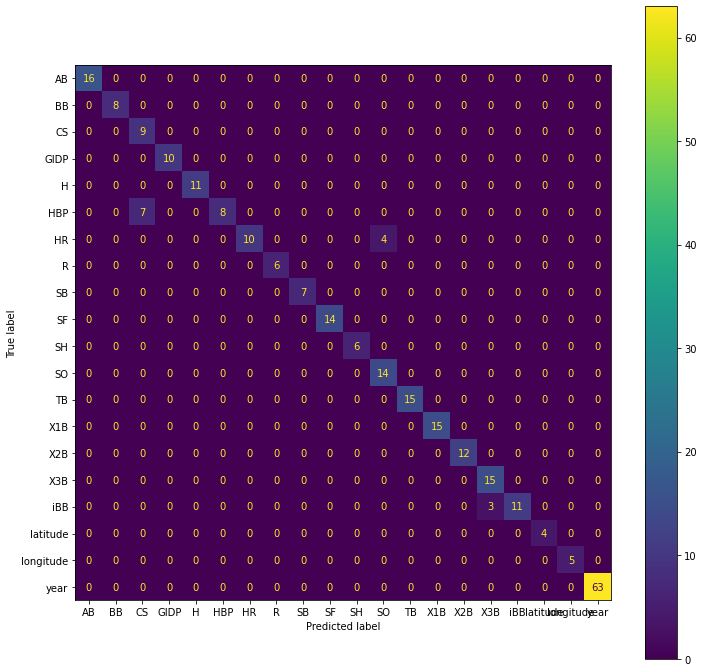

In [11]:
# confusion matrix
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
import matplotlib.pyplot as plt


labels = [label for label in class_report_dict.keys() if label not in ["accuracy", "macro avg", "weighted avg"]]
cm_plot = ConfusionMatrixDisplay(confusion_matrix(true_types, predicted_types, labels=labels), display_labels=labels)

fig, ax = plt.subplots(figsize=(12,12))
cm_plot.plot(ax=ax)

### with pruning

In [43]:
labeled_data_size = 4
random_state = 2
table_frac = None
pruning_mode = 1
true_types = []
predicted_types = []
total_numeric_cols_to_predict = 0
EMD_threshold_factor = 0.01

results_normal_emd = []
for index, rank_file in enumerate(glob.glob(join("normal_EMD", "results", f"*appr1_pruning{pruning_mode}_{table_frac}_{labeled_data_size}_absolute_20.0_{random_state}.csv"))):
    # if index > 1:
    #     break
    total_numeric_cols_to_predict += 1 
    df_ranked_EMD = pd.read_csv(rank_file)
    # if df_ranked_EMD.iloc[0]["real_semantic_type"] in ["latitude", "longitude"]:
    #     continue
    if len(df_ranked_EMD) == 0:
        continue
    # EMD Threshold check
    if df_ranked_EMD.iloc[0]["EMD"] >= (df_ranked_EMD.iloc[0]["std"] * EMD_threshold_factor):
        #pass
        continue
    if len(df_ranked_EMD) < 2:
        true_types.append(df_ranked_EMD.iloc[0]["real_semantic_type"])
        predicted_types.append(df_ranked_EMD.iloc[0]["semantic_type"])
        results_normal_emd.append(df_ranked_EMD.iloc[0].values.tolist())
    if len(df_ranked_EMD) > 2:
        if (df_ranked_EMD.iloc[0]["EMD"] == df_ranked_EMD.iloc[1]["EMD"]) & (df_ranked_EMD.iloc[0]["semantic_type"] != df_ranked_EMD.iloc[1]["semantic_type"]):
            print("Equal EMD 1 & 2 but different types")
            #pass
            continue
        true_types.append(df_ranked_EMD.iloc[0]["real_semantic_type"])
        predicted_types.append(df_ranked_EMD.iloc[0]["semantic_type"])
        results_normal_emd.append(df_ranked_EMD.iloc[0].values.tolist())
print(total_numeric_cols_to_predict)
print(len(true_types))
class_report = classification_report(true_types, predicted_types)
class_report_dict = classification_report(true_types, predicted_types, output_dict=True)
results_normal_emd = pd.DataFrame(results_normal_emd, columns=['unlabeled_col', 'real_semantic_type', 'labeled_col', 'semantic_type','EMD', 'mean', 'std'])
results_normal_emd = results_normal_emd[results_normal_emd["real_semantic_type"] == results_normal_emd["semantic_type"]]

715
191


In [44]:
print(f"Labeled data size: {labeled_data_size}")
print(f"EMD-Threshold: {EMD_threshold_factor} * std")
print(class_report)

Labeled data size: 4
EMD-Threshold: 0.01 * std
              precision    recall  f1-score   support

          AB       1.00      1.00      1.00         9
          BB       1.00      1.00      1.00         7
          CS       0.59      1.00      0.74        10
        GIDP       1.00      1.00      1.00         8
           H       1.00      1.00      1.00         8
         HBP       1.00      0.42      0.59        12
          HR       1.00      0.69      0.82        13
           R       1.00      1.00      1.00         7
          SB       1.00      1.00      1.00         5
          SF       1.00      1.00      1.00         9
          SH       1.00      1.00      1.00         7
          SO       0.73      1.00      0.85        11
          TB       1.00      1.00      1.00        10
         X1B       1.00      1.00      1.00         6
         X2B       1.00      1.00      1.00         5
         X3B       0.80      1.00      0.89        12
         iBB       1.00      0.57 

### normal EMD to gen_train_data file for retrainig

In [7]:
labeled_data_size = 5
random_state = 2
table_frac = None

total_numeric_cols_to_predict = 0
EMD_threshold_factor = 0.01

results_normal_emd = []
for index, rank_file in enumerate(glob.glob(join("normal_EMD", "results", f"*appr1_{table_frac}_{labeled_data_size}_absolute_20.0_{random_state}.csv"))):
    # if index > 0:
    #     break
    total_numeric_cols_to_predict += 1 
    df_ranked_EMD = pd.read_csv(rank_file)
    #print(df_ranked_EMD)
    # if df_ranked_EMD.iloc[0]["real_semantic_type"] in ["latitude", "longitude"]:
    #     continue
    if len(df_ranked_EMD) == 0:
        continue
    # EMD Threshold check
    if df_ranked_EMD.iloc[0]["EMD"] >= (df_ranked_EMD.iloc[0]["std"] * EMD_threshold_factor):
        #pass
        continue
    if len(df_ranked_EMD) < 2:
        results_normal_emd.append([df_ranked_EMD.iloc[0]["unlabeled_col"].split("+")[0], df_ranked_EMD.iloc[0]["unlabeled_col"].split("+")[1], df_ranked_EMD.iloc[0]["unlabeled_col"], df_ranked_EMD.iloc[0]["semantic_type"]])
    if len(df_ranked_EMD) > 2:
        if (df_ranked_EMD.iloc[0]["EMD"] == df_ranked_EMD.iloc[1]["EMD"]) & (df_ranked_EMD.iloc[0]["semantic_type"] != df_ranked_EMD.iloc[1]["semantic_type"]):
            print("Equal EMD 1 & 2 but different types")
            #pass
            continue
        results_normal_emd.append([df_ranked_EMD.iloc[0]["unlabeled_col"].split("+")[0], df_ranked_EMD.iloc[0]["unlabeled_col"].split("+")[1], df_ranked_EMD.iloc[0]["unlabeled_col"], df_ranked_EMD.iloc[0]["semantic_type"]])

results_df = pd.DataFrame(results_normal_emd, columns=["table", "column", "dataset_id", "predicted_semantic_type"])
results_df.to_csv(join("normal_EMD", "out", "gen_train_data", f"public_bi_num_gen_training_data_{EMD_threshold_factor}_{table_frac}_{labeled_data_size}_absolute_{20.0}_{random_state}.csv"), index=False)

In [10]:
results_df

,table,column,dataset_id,predicted_semantic_type
0,MLB_20,column_58,MLB_20+column_58,year
1,MLB_49,column_48,MLB_49+column_48,X3B
2,MLB_51,column_19,MLB_51+column_19,HBP
3,MLB_29,column_58,MLB_29+column_58,year
4,MLB_35,column_48,MLB_35+column_48,iBB
...,...,...,...,...
240,MLB_35,column_46,MLB_35+column_46,X3B
241,MLB_42,column_42,MLB_42+column_42,X2B
242,MLB_28,column_48,MLB_28+column_48,iBB
243,MLB_33,column_46,MLB_33+column_46,X3B


#### combine the string based gen train data with the num based gen train data for retraining sato

In [11]:
import pandas as pd
from os.path import join

corpus = "public_bi_num"
EMD_threshold_factor = 0.01
random_state = 1
labeled_data_size = 1



for labeled_data_size in [1,2,3,4,5]:
    ### load string based gen train data from previous results on public bi (not public bi num).
    str_based_gen_train_data = pd.read_csv(join(os.environ["WORKING_DIR"], "labeling_functions", "combined_LFs", "gen_training_data", f"public_bi_gen_training_data_all_combined_maj_{labeled_data_size}_absolute_20.0_{random_state}.csv"))
    # delete all previous gen train data for numeric type year
    #str_based_gen_train_data = str_based_gen_train_data[str_based_gen_train_data["predicted_semantic_type"] != "year"]

    ### load numeric based gen train data
    num_based_gen_train_data = pd.read_csv(join(os.environ["WORKING_DIR"], "labeling_functions", "numerics", "normal_EMD", "out", "gen_train_data", f"public_bi_num_gen_training_data_pruningNone_{EMD_threshold_factor}_None_{labeled_data_size}_absolute_20.0_{random_state}.csv"))

    ### combine gen train data
    combined_gen_train_data = pd.concat([str_based_gen_train_data, num_based_gen_train_data]).drop_duplicates(keep="last")

    # save for retraining
    combined_gen_train_data.to_csv(join(os.environ["WORKING_DIR"], "labeling_functions", "combined_LFs", "gen_training_data", f"public_bi_num_gen_training_data_all_combined_maj_{labeled_data_size}_absolute_20.0_{random_state}.csv"), index=False)

#### combine the string based gen train data with the num based gen train data for retraining sato

In [ ]:
import pandas as pd
from os.path import join

corpus = "sportsDB"
EMD_threshold_factor = 0.01
random_state = 1
labeled_data_size = 1

In [49]:
str_based_gen_train_data

,table,column,dataset_id,predicted_semantic_type
0,CityMaxCapita_1,column_2,CityMaxCapita_1+column_2,city
1,CityMaxCapita_1,column_14,CityMaxCapita_1+column_14,language
2,CityMaxCapita_1,column_20,CityMaxCapita_1+column_20,region
3,CityMaxCapita_1,column_23,CityMaxCapita_1+column_23,state
4,CMSprovider_1,column_13,CMSprovider_1+column_13,city
...,...,...,...,...
429,YaleLanguages_3,column_15,YaleLanguages_3+column_15,language
430,YaleLanguages_4,column_1,YaleLanguages_4+column_1,format
431,YaleLanguages_4,column_15,YaleLanguages_4+column_15,language
432,YaleLanguages_5,column_1,YaleLanguages_5+column_1,format


In [50]:
num_based_gen_train_data

,table,column,dataset_id,predicted_semantic_type
0,MLB_43,column_41,MLB_43+column_41,X1B
1,MLB_59,column_37,MLB_59+column_37,SB
2,MLB_37,column_37,MLB_37+column_37,SO
3,MLB_44,column_41,MLB_44+column_41,X1B
4,MLB_29,column_46,MLB_29+column_46,X3B
...,...,...,...,...
68,MLB_45,column_34,MLB_45+column_34,R
69,MLB_8,column_25,MLB_8+column_25,X2B
70,Rentabilidad_9,column_57,Rentabilidad_9+column_57,longitude
71,MLB_58,column_37,MLB_58+column_37,SB


In [51]:
pd.concat([str_based_gen_train_data, num_based_gen_train_data]).drop_duplicates(keep="last")

,table,column,dataset_id,predicted_semantic_type
0,CityMaxCapita_1,column_2,CityMaxCapita_1+column_2,city
1,CityMaxCapita_1,column_14,CityMaxCapita_1+column_14,language
2,CityMaxCapita_1,column_20,CityMaxCapita_1+column_20,region
3,CityMaxCapita_1,column_23,CityMaxCapita_1+column_23,state
4,CMSprovider_1,column_13,CMSprovider_1+column_13,city
...,...,...,...,...
68,MLB_45,column_34,MLB_45+column_34,R
69,MLB_8,column_25,MLB_8+column_25,X2B
70,Rentabilidad_9,column_57,Rentabilidad_9+column_57,longitude
71,MLB_58,column_37,MLB_58+column_37,SB


### normal EMD SportsDB

In [1]:
import glob
from os.path import join
from sklearn.metrics import classification_report
import pandas as pd


semantic_type_mapping_sportsDB = {
    "nonPenaltyGoals" : "goals",
    "nonPenaltyGoalsPlusAssists" : "goalsPlusAssistsPer90Min",
    "gamesStarted" : "gamesPlayed",
    "matchesPlayedCompletely": "gamesPlayed"
}

labeled_data_size = 1
random_state = 2
table_frac = None

true_types = []
predicted_types = []
total_numeric_cols_to_predict = 0
EMD_threshold_factor = 0.1

results_normal_emd = []
for index, rank_file in enumerate(glob.glob(join("normal_EMD", "results", "sportsDB", f"*appr1_{table_frac}_{labeled_data_size}_absolute_20.1_{random_state}.csv"))):
    # if index > 1:
    #     break
    total_numeric_cols_to_predict += 1 
    df_ranked_EMD = pd.read_csv(rank_file)
    # if df_ranked_EMD.iloc[0]["real_semantic_type"] in ["latitude", "longitude"]:
    #     continue
    if len(df_ranked_EMD) == 0:
        continue
    # EMD Threshold check
    if df_ranked_EMD.iloc[0]["EMD"] >= (df_ranked_EMD.iloc[0]["std"] * EMD_threshold_factor):
        #pass
        continue
    if len(df_ranked_EMD) < 2:
        true_types.append(df_ranked_EMD.iloc[0]["real_semantic_type"])
        predicted_types.append(df_ranked_EMD.iloc[0]["semantic_type"])
        results_normal_emd.append(df_ranked_EMD.iloc[0].values.tolist())
    if len(df_ranked_EMD) > 2:
        if (df_ranked_EMD.iloc[0]["EMD"] == df_ranked_EMD.iloc[1]["EMD"]) & (df_ranked_EMD.iloc[0]["semantic_type"] != df_ranked_EMD.iloc[1]["semantic_type"]):
            print("Equal EMD 1 & 2 but different types")
            #pass
            continue
        true_types.append(df_ranked_EMD.iloc[0]["real_semantic_type"])
        predicted_types.append(df_ranked_EMD.iloc[0]["semantic_type"])
        results_normal_emd.append(df_ranked_EMD.iloc[0].values.tolist())
    #### semantic type mapping
    true_types = [semantic_type_mapping_sportsDB[s_type] if s_type in list(semantic_type_mapping_sportsDB.keys()) else s_type for s_type in true_types]
    predicted_types = [semantic_type_mapping_sportsDB[s_type] if s_type in list(semantic_type_mapping_sportsDB.keys()) else s_type for s_type in predicted_types]

print(total_numeric_cols_to_predict)
print(len(true_types))
class_report = classification_report(true_types, predicted_types)
class_report_dict = classification_report(true_types, predicted_types, output_dict=True)
results_normal_emd = pd.DataFrame(results_normal_emd, columns=['unlabeled_col', 'real_semantic_type', 'labeled_col', 'semantic_type','EMD', 'mean', 'std'])
results_normal_emd = results_normal_emd[results_normal_emd["real_semantic_type"] == results_normal_emd["semantic_type"]]

/home/sanonymous/.local/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


870
410


/home/sanonymous/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sanonymous/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sanonymous/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sanonymous/.local/lib/

In [2]:
print(f"Labeled data size: {labeled_data_size}")
print(f"EMD-Threshold: {EMD_threshold_factor} * std")
print(class_report)

Labeled data size: 1
EMD-Threshold: 0.1 * std
                             precision    recall  f1-score   support

                        age       1.00      1.00      1.00        13
                    assists       0.88      1.00      0.94        30
                gamesPlayed       1.00      1.00      1.00        75
                      goals       1.00      0.45      0.62       103
   goalsPlusAssistsPer90Min       0.00      0.00      0.00         4
              minutesPlayed       1.00      1.00      1.00         1
   nonPenaltyXGoalsPer90Min       0.48      1.00      0.65        10
nonPenaltyXGoalsPlusAssists       1.00      1.00      1.00        11
         penaltiesAttempted       0.25      0.18      0.21        50
            penaltiesScored       0.40      0.52      0.45        52
                   redCards       1.00      0.94      0.97        32
           xAssistsPer90Min       1.00      1.00      1.00         7
             xGoalsPer90Min       0.12      0.60      0.

In [3]:
# confusion matrix
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
import matplotlib.pyplot as plt


labels = [label for label in class_report_dict.keys() if label not in ["accuracy", "macro avg", "weighted avg"]]
cm_plot = ConfusionMatrixDisplay(confusion_matrix(true_types, predicted_types, labels=labels), display_labels=labels)

fig, ax = plt.subplots(figsize=(12,12))

cm_plot.plot(ax=ax)

plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

### final plot for LF EMD

In [9]:
semantic_type_mapping_sportsDB = {
    "nonPenaltyGoals" : "goals",
    "nonPenaltyGoalsPlusAssists" : "goalsPlusAssistsPer90Min",
    "gamesStarted" : "gamesPlayed",
    "matchesPlayedCompletely": "gamesPlayed"
}

labeled_data_size = 4
random_state = 2
table_frac = None
pruning_mode = 1

results_normal_emd = []

results_normal_emd_weighted_precision = []
results_normal_emd_macro_precision = []
results_normal_emd_support = []

results_normal_emd_weighted_precision_sportsDB = []
results_normal_emd_macro_precision_sportsDB = []
results_normal_emd_support_sportsDB = []

for labeled_data_size in [1,2,3,4,5]:
    true_types = []
    predicted_types = []
    total_numeric_cols_to_predict = 0

    #### Public BI Num
    EMD_threshold_factor = 0.01
    for index, rank_file in enumerate(glob.glob(join("normal_EMD", "results", f"*appr1_pruning{pruning_mode}_{table_frac}_{labeled_data_size}_absolute_20.0_{random_state}.csv"))):
        # if index > 1:
        #     break
        total_numeric_cols_to_predict += 1 
        df_ranked_EMD = pd.read_csv(rank_file)
        # if df_ranked_EMD.iloc[0]["real_semantic_type"] in ["latitude", "longitude"]:
        #     continue
        if len(df_ranked_EMD) == 0:
            continue
        # EMD Threshold check
        if df_ranked_EMD.iloc[0]["EMD"] >= (df_ranked_EMD.iloc[0]["std"] * EMD_threshold_factor):
            #pass
            continue
        if len(df_ranked_EMD) < 2:
            true_types.append(df_ranked_EMD.iloc[0]["real_semantic_type"])
            predicted_types.append(df_ranked_EMD.iloc[0]["semantic_type"])
            results_normal_emd.append(df_ranked_EMD.iloc[0].values.tolist())
        if len(df_ranked_EMD) > 2:
            if (df_ranked_EMD.iloc[0]["EMD"] == df_ranked_EMD.iloc[1]["EMD"]) & (df_ranked_EMD.iloc[0]["semantic_type"] != df_ranked_EMD.iloc[1]["semantic_type"]):
                print("Equal EMD 1 & 2 but different types")
                #pass
                continue
            true_types.append(df_ranked_EMD.iloc[0]["real_semantic_type"])
            predicted_types.append(df_ranked_EMD.iloc[0]["semantic_type"])
            results_normal_emd.append(df_ranked_EMD.iloc[0].values.tolist())
    print(total_numeric_cols_to_predict)
    print(len(true_types))
    class_report = classification_report(true_types, predicted_types)
    class_report_dict = classification_report(true_types, predicted_types, output_dict=True)

    results_normal_emd_weighted_precision.append(class_report_dict["weighted avg"]["f1-score"])
    results_normal_emd_macro_precision.append(class_report_dict["macro avg"]["f1-score"])
    results_normal_emd_support.append(class_report_dict["weighted avg"]["support"])

    true_types = []
    predicted_types = []
    total_numeric_cols_to_predict = 0

    ### Sports DB
    EMD_threshold_factor = 0.1
    for index, rank_file in enumerate(glob.glob(join("normal_EMD", "results", "sportsDB", f"*appr1_{table_frac}_{labeled_data_size}_absolute_20.1_2.csv"))):
        # if index > 1:
        #     break
        total_numeric_cols_to_predict += 1 
        df_ranked_EMD = pd.read_csv(rank_file)
        # if df_ranked_EMD.iloc[0]["real_semantic_type"] in ["latitude", "longitude"]:
        #     continue
        if len(df_ranked_EMD) == 0:
            continue
        # EMD Threshold check
        if df_ranked_EMD.iloc[0]["EMD"] >= (df_ranked_EMD.iloc[0]["std"] * EMD_threshold_factor):
            #pass
            continue
        if len(df_ranked_EMD) < 2:
            true_types.append(df_ranked_EMD.iloc[0]["real_semantic_type"])
            predicted_types.append(df_ranked_EMD.iloc[0]["semantic_type"])
            results_normal_emd.append(df_ranked_EMD.iloc[0].values.tolist())
        if len(df_ranked_EMD) > 2:
            if (df_ranked_EMD.iloc[0]["EMD"] == df_ranked_EMD.iloc[1]["EMD"]) & (df_ranked_EMD.iloc[0]["semantic_type"] != df_ranked_EMD.iloc[1]["semantic_type"]):
                print("Equal EMD 1 & 2 but different types")
                #pass
                continue
            true_types.append(df_ranked_EMD.iloc[0]["real_semantic_type"])
            predicted_types.append(df_ranked_EMD.iloc[0]["semantic_type"])
            results_normal_emd.append(df_ranked_EMD.iloc[0].values.tolist())

    #### semantic type mapping
    true_types = [semantic_type_mapping_sportsDB[s_type] if s_type in list(semantic_type_mapping_sportsDB.keys()) else s_type for s_type in true_types]
    predicted_types = [semantic_type_mapping_sportsDB[s_type] if s_type in list(semantic_type_mapping_sportsDB.keys()) else s_type for s_type in predicted_types]

    print(total_numeric_cols_to_predict)
    print(len(true_types))
    class_report = classification_report(true_types, predicted_types)
    class_report_dict = classification_report(true_types, predicted_types, output_dict=True)

    results_normal_emd_weighted_precision_sportsDB.append(class_report_dict["weighted avg"]["f1-score"])
    results_normal_emd_macro_precision_sportsDB.append(class_report_dict["macro avg"]["f1-score"])
    results_normal_emd_support_sportsDB.append(class_report_dict["weighted avg"]["support"])
    
    

775
67
865
529
755
105


/home/sanonymous/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sanonymous/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sanonymous/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sanonymous/.local/lib/

848
622
735
154
830
676
715
191
811
703
695
216
794
727


In [5]:
results_normal_emd_weighted_precision

[0.9542845214487005,
 0.892057186510968,
 0.9075539433828204,
 0.9223448305678056,
 0.9334181686142471]

In [6]:
results_normal_emd_weighted_precision_sportsDB

[0.8557992369201687,
 0.9063828373585932,
 0.9025441792060394,
 0.9575107906357958,
 0.9474380409570148]

In [7]:
results_normal_emd_support

[67, 105, 154, 191, 216]

In [8]:
results_normal_emd_support_sportsDB

[529, 622, 676, 703, 727]

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os.path import join

#nlabeled_data_sizes = []
###### Load number of unlabeled data
# for labeled_data_size in x_values:
#     with open(f"../data/extract/out/labeled_unlabeled_test_split/{corpus}_{labeled_data_size}_absolute_20.0_1.json") as f:
#         unlabeled_data_sizes.append(len(json.load(f)[f"unlabeled"]))
        

corpus = "public_bi_num"

fig, ax1 = plt.subplots(figsize=(9,7))

x_values = [1,2,3,4,5]

results_normal_emd_weighted_precision = []
error_normal_emd_weighted_precision = []
results_normal_emd_support = []
error_normal_emd_support = []

#### get results on Public BI Num
for labeled_data_size in x_values:
    df = pd.read_csv(join("../numerics/","normal_EMD","out","validation", f"{corpus}_classification_report_unlabeled_pruningNone_0.01_None_{labeled_data_size}_absolute_20.0_mean.csv"), index_col=0)
    
    results_normal_emd_weighted_precision.append(df["mean"][f"precisions_weighted"])
    error_normal_emd_weighted_precision.append(df["std"][f"precisions_weighted"])
    
    results_normal_emd_support.append(df["mean"][f"supports_weighted"])
    error_normal_emd_support.append(df["std"][f"supports_weighted"])


#lns1 = ax1.plot(x_values, results_normal_emd_weighted_precision, marker="o", color="C0", label="Precision (Public BI Num)")
lns1 = ax1.errorbar(x_values, results_normal_emd_weighted_precision,error_normal_emd_weighted_precision, marker="o",capsize=3, color="C0", label="Precision (Public BI Num)")
#lns2 = ax1.plot(x_values, results_normal_emd_macro_precision, marker="o", color="C0", linestyle="dotted", label="Precision (macro)")
lns1_1 = ax1.plot(x_values, results_normal_emd_weighted_precision_sportsDB, marker="d", color="C0", linestyle="dotted", label="Precision (SportsDB)")
#lns2_1 = ax1.plot(x_values, results_normal_emd_macro_precision_sportsDB, marker="X", color="C0", linestyle="dotted", label="Precision (macro) SportsDB")


#plt.yticks(np.arange(0.9,1.15,0.05), fontsize=15)
plt.yticks(np.arange(0.8,1.15,0.05), fontsize=17)
plt.xticks(np.arange(1,6,1), fontsize=17)
plt.grid()
#plt.legend(loc=1,fontsize=17)
#plt.title(f"{title}", fontsize=20)
plt.xlabel("labeled data size: # of labeled columns per semantic type", fontsize=17)
plt.ylabel(f"Precision", fontsize=17)
ax2 = ax1.twinx()
#lns3 = ax2.plot(x_values, results_normal_emd_support, marker="o", color="C1", label="#gen. train. data (Public BI Num)" )
lns3 = ax2.errorbar(x_values, results_normal_emd_support,error_normal_emd_support, marker="o", capsize=3, color="C1", label="#gen. train. data (Public BI Num)" )
lns3_1 = ax2.plot(x_values, results_normal_emd_support_sportsDB, marker="d", color="C1", linestyle="dotted", label="#gen. train. data (SportsDB)")
ax2.set_ylabel("#gen. train. data", fontsize=17)
#ax2.set_yticks(np.arange(49700,50100,100))
#ax2.set_yticks(np.arange(60,240,20))
ax2.tick_params(axis="y", labelsize=17)
#ax2.legend(loc=1,fontsize=17)

#### add legend from the 3 lines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines+lines2, labels+labels2, ncol=2, bbox_to_anchor=(0.5,1.25), fancybox=True,shadow=True, loc="upper center",fontsize=21)


plt.savefig(join("../../results","final_plots", f"Gen_train_data_EMD.png"), bbox_inches='tight', dpi=100, transparent=True)
plt.show()

In [12]:
results_normal_emd_weighted_precision

[0.97175005477219,
 0.9616085682875974,
 0.9666376421650392,
 0.973033691173436,
 0.9700521965565582]

In [18]:
results_normal_emd_support

[76.0, 128.6, 171.2, 207.0, 235.2]

# Combine results of normal EMD and join n' grouped EMD

In [12]:
from snorkel.labeling.model import MajorityLabelVoter
from data_loader.utils import get_label_encoder
import numpy as np

label_enc = get_label_encoder()


### load normal EMD results
labeled_data_size = 5
table_frac = None

results = []

for index, rank_file in enumerate(glob.glob(join("normal_EMD", "results", f"*{table_frac}_{labeled_data_size}_absolute_20.0_2.csv"))): 
    df_ranked_EMD = pd.read_csv(rank_file)
    results.append([df_ranked_EMD.iloc[0]["unlabeled_col"], label_enc.transform([df_ranked_EMD.iloc[0]["semantic_type"]])[0], df_ranked_EMD.iloc[0]["real_semantic_type"]])

df_normal_EMD = pd.DataFrame(results, columns=["dataset_id", "appr_1", "real_semantic_type_1"])


## load joined n' grouped EMD
max_group_size = 10
approach = 5

results = []
for index, rank_file in enumerate(glob.glob(join("joined_n_grouped_EMD", "results", f"*appr{approach}_{max_group_size}_{table_frac}_{labeled_data_size}_absolute_20.0_2.csv"))):
    df_ranked_EMD = pd.read_csv(rank_file)

    if len(df_ranked_EMD) == 0:
        continue
    # EMD Threshold check
    if df_ranked_EMD.iloc[0]["EMD"] >= df_ranked_EMD.iloc[0]["EMD_threshold"] * 0.025:
        pass
        #continue
    if len(df_ranked_EMD) == 1:
        results.append([df_ranked_EMD.iloc[0]["unlabeled_col"], label_enc.transform([df_ranked_EMD.iloc[0]["semantic_type"]])[0], df_ranked_EMD.iloc[0]["real_semantic_type"]])
        continue
    if len(df_ranked_EMD) > 2:
        if (df_ranked_EMD.iloc[0]["EMD"] == df_ranked_EMD.iloc[1]["EMD"]) and (df_ranked_EMD.iloc[0]["semantic_type"] != df_ranked_EMD.iloc[1]["semantic_type"]):
            #pass
            continue
        results.append([df_ranked_EMD.iloc[0]["unlabeled_col"], label_enc.transform([df_ranked_EMD.iloc[0]["semantic_type"]])[0], df_ranked_EMD.iloc[0]["real_semantic_type"]])

df_jng_EMD = pd.DataFrame(results, columns=["dataset_id", "appr_5", "real_semantic_type_5"])
df_combined = pd.concat([df_normal_EMD.set_index("dataset_id"), df_jng_EMD.set_index("dataset_id")], axis=1).fillna(-1)
df_combined["appr_1"] = df_combined["appr_1"].apply(lambda x: int(x))
df_combined["appr_5"] = df_combined["appr_5"].apply(lambda x: int(x))
df_combined["real_semantic_type"] = df_combined.apply(lambda row: row["real_semantic_type_1"] if row["real_semantic_type_1"] != -1 else row["real_semantic_type_5"], axis=1)
del(df_combined["real_semantic_type_1"])
del(df_combined["real_semantic_type_5"])

L_train = []
L_train.append(df_combined["appr_1"].to_list())
L_train.append(df_combined["appr_5"].to_list())
L_train = np.array(L_train).transpose()

label_model = MajorityLabelVoter(cardinality=len(label_enc.classes_))
preds_train = label_model.predict(L=L_train)

df_combined["combined"] = preds_train
df_combined["combined"] = df_combined["combined"].apply(lambda x: label_enc.inverse_transform([x])[0] if x != -1 else None)
df_combined = df_combined.dropna()


KeyboardInterrupt



In [103]:
class_report = classification_report(df_combined["real_semantic_type"].to_list(), df_combined["combined"].to_list())
print(class_report)

              precision    recall  f1-score   support

          AB       0.59      0.95      0.73        39
          BB       0.52      0.41      0.45        37
          CS       0.23      0.82      0.36        11
        GIDP       0.50      0.38      0.43        34
           H       0.43      0.42      0.43        38
         HBP       0.21      0.21      0.21        39
          HR       0.60      0.39      0.47        31
           R       1.00      0.67      0.80         9
          SB       0.27      0.58      0.37        12
          SF       0.48      0.34      0.40        35
          SH       0.30      0.34      0.32        35
          SO       0.58      0.58      0.58        36
          TB       0.57      0.43      0.49        37
         X1B       0.81      0.35      0.49        37
         X2B       0.61      0.51      0.56        37
         X3B       0.58      0.51      0.54        37
         iBB       0.49      0.74      0.59        31
    latitude       1.00    

In [88]:
label_enc.inverse_transform([1])

array(['BB'], dtype='<U14')

## check which cols can be predicted with jng EMD and not with normal EMD

In [15]:
[col for col in results_jng_emd["unlabeled_col"].tolist() if col not in results_normal_emd["unlabeled_col"].tolist()]

['MLB_23+column_46', 'MLB_7+column_26', 'MLB_30+column_19']

In [16]:
results_jng_emd

,unlabeled_col,real_semantic_type,labeled_col,semantic_type,EMD,EMD_treshold
0,MLB_64+column_41,SO,MLB_65+column_41,SO,0.000000,0.787127
1,MLB_17+column_47,TB,MLB_15+column_47,TB,0.000000,7.850157
2,MLB_26+column_58,year,MLB_39+column_46,year,0.001539,2013.020064
3,MLB_23+column_46,X3B,MLB_30+column_46,X3B,0.000000,0.114905
4,MLB_39+column_46,year,MLB_26+column_58,year,0.001539,2013.087731
5,MLB_1+column_45,year,MLB_7+column_37,year,0.003109,2013.022371
6,MLB_30+column_18,GIDP,MLB_26+column_18,GIDP,0.000000,0.452673
7,MLB_7+column_26,X3B,MLB_30+column_46,X3B,0.000799,0.153720
8,MLB_30+column_58,year,MLB_26+column_58,year,0.000000,2013.020064
9,MLB_10+column_8,GIDP,MLB_11+column_8,GIDP,0.000000,0.411355


# Analyze EMD values of each combination for one unlabeled numerical col to the labeled numerical col

## Public BI Num

695
Min: 0.0
0.25 Quantile: 0.0
0.50 Quantile: 0.0349879086518583
0.75 Quantile: 0.348486919987448
Max: 176957018.80620995
Mean: 404366.6724351732
0.1 Quantile: 0.0
0.15000000000000002 Quantile: 0.0
0.20000000000000004 Quantile: 0.0
0.25000000000000006 Quantile: 0.0
0.30000000000000004 Quantile: 0.0
0.3500000000000001 Quantile: 0.0014707658764802
0.40000000000000013 Quantile: 0.0106410683742512
0.45000000000000007 Quantile: 0.02052693588121557


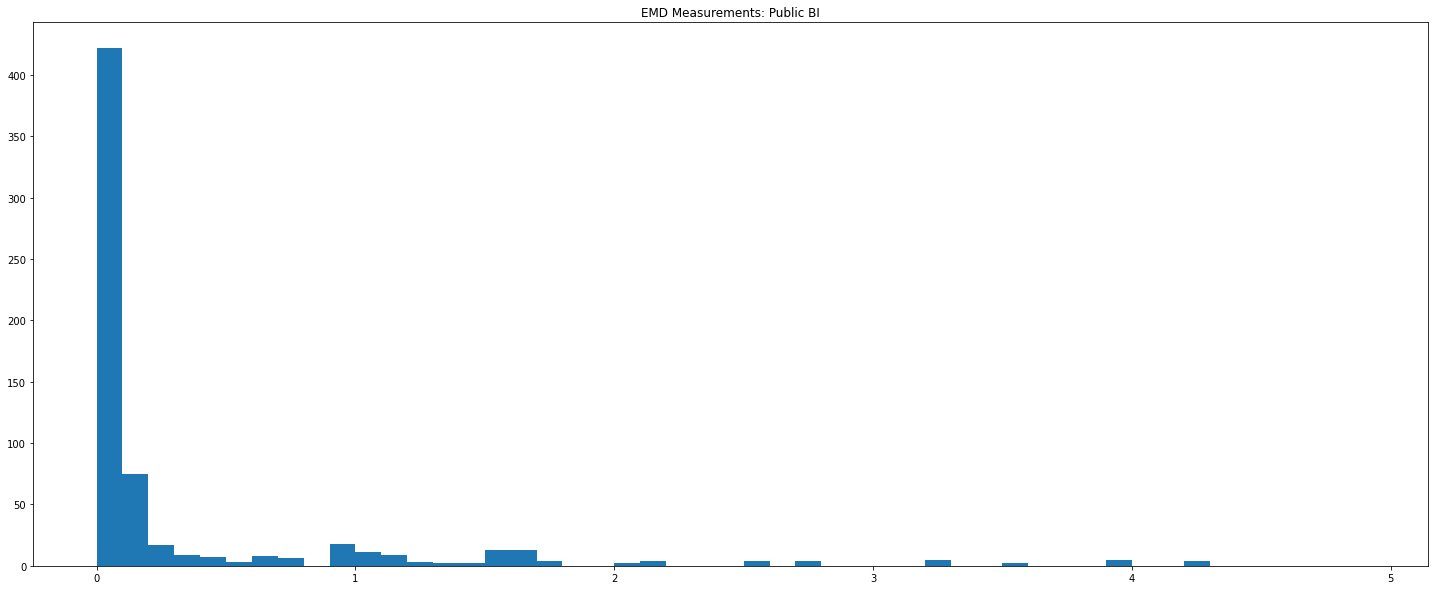

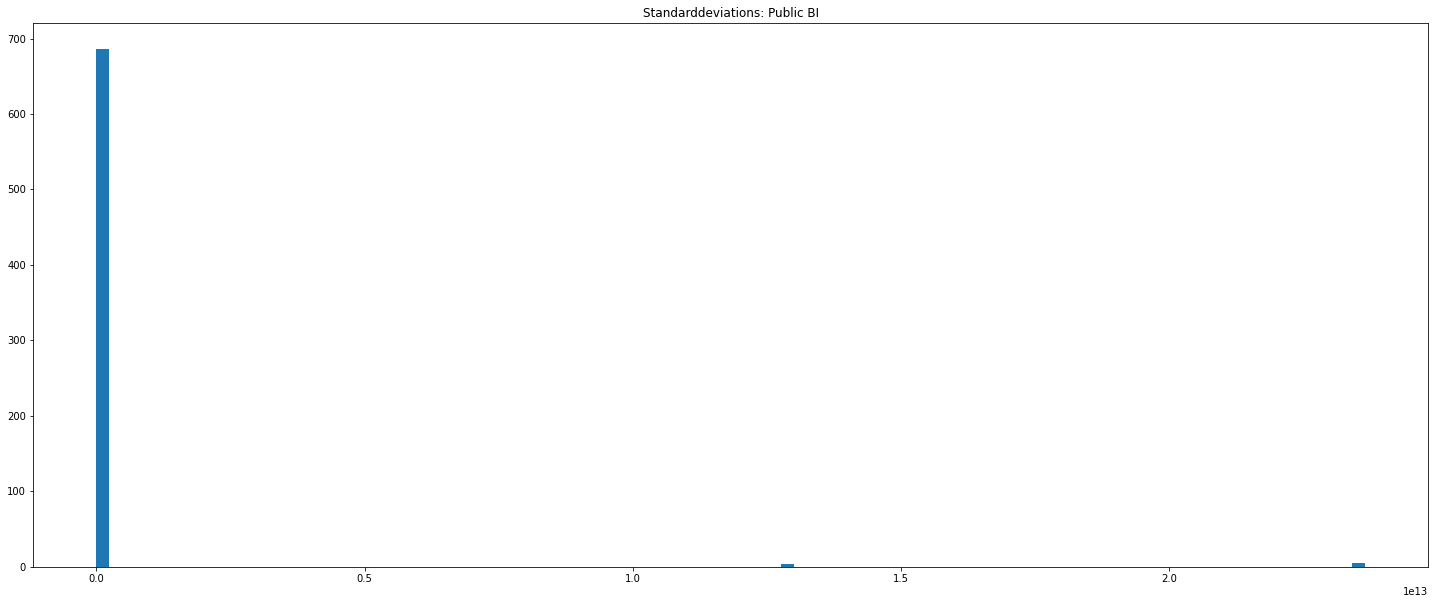

In [3]:
labeled_data_size = 5
table_frac = None

true_types = []
predicted_types = []
total_numeric_cols_to_predict = 0
EMD_threshold_factor = 0.01

emds = []
stds = []
for index, rank_file in enumerate(glob.glob(join("normal_EMD", "results", f"*appr1_{table_frac}_{labeled_data_size}_absolute_20.0_2.csv"))):
    # if index == 10:
    #     break
    total_numeric_cols_to_predict += 1 
    df_ranked_EMD = pd.read_csv(rank_file)
    if len(df_ranked_EMD) > 0: 
        emds.append(df_ranked_EMD["EMD"].tolist()[0])
        stds.append(df_ranked_EMD["std"].tolist()[0])
        #emds.extend(df_ranked_EMD["EMD"].tolist()[:3])


print(len(emds))
emds = np.array(emds)

print(f"Min: {emds.min()}")
print(f"0.25 Quantile: {np.quantile(emds, 0.25)}")
print(f"0.50 Quantile: {np.quantile(emds, 0.5)}")
print(f"0.75 Quantile: {np.quantile(emds, 0.75)}")
print(f"Max: {emds.max()}")
print(f"Mean: {emds.mean()}")

for quantile_value in np.arange(0.1,0.5,0.05):
    print(f"{quantile_value} Quantile: {np.quantile(emds, quantile_value)}")

#bins = np.arange(0.001,0.01,0.001).tolist()+np.arange(0.01,0.1,0.01).tolist()#+np.arange(0.1,1,0.1).tolist()+np.arange(1,10,1).tolist()
bins = np.arange(0,5, 0.1)
#bins = 1000
figsize = (25,10)

plt.figure(figsize=figsize)
plt.hist(x=emds, bins=bins)
plt.title("EMD Measurements: Public BI")
#plt.xticks(bins, rotation=90)
plt.show()


plt.figure(figsize=figsize)
plt.hist(x=stds, bins=100)
plt.title("Standarddeviations: Public BI")
#plt.xticks(bins, rotation=90)
plt.show()

emds_public_bi = emds

### try to use a quantile to build EMD Threshold

In [58]:
labeled_data_size = 1
random_state = 2
table_frac = None

true_types = []
predicted_types = []
total_numeric_cols_to_predict = 0
#EMD_threshold_factor = 0.01

emds = []
emd_quantile = 0.1
for index, rank_file in enumerate(glob.glob(join("normal_EMD", "results", f"*appr1_{table_frac}_{labeled_data_size}_absolute_20.0_{random_state}.csv"))):
    df_ranked_EMD = pd.read_csv(rank_file)
    if len(df_ranked_EMD) > 0: 
        emds.append(df_ranked_EMD["EMD"].tolist()[0])

EMD_threshold_factor = np.quantile(emds, emd_quantile)

results_normal_emd = []
for index, rank_file in enumerate(glob.glob(join("normal_EMD", "results", f"*appr1_{table_frac}_{labeled_data_size}_absolute_20.0_{random_state}.csv"))):
    # if index > 1:
    #     break
    total_numeric_cols_to_predict += 1 
    df_ranked_EMD = pd.read_csv(rank_file)
    # if df_ranked_EMD.iloc[0]["real_semantic_type"] in ["latitude", "longitude"]:
    #     continue
    if len(df_ranked_EMD) == 0:
        continue
    # EMD Threshold check
    if df_ranked_EMD.iloc[0]["EMD"] >= (df_ranked_EMD.iloc[0]["std"] * EMD_threshold_factor):
        #pass
        continue
    if len(df_ranked_EMD) < 2:
        true_types.append(df_ranked_EMD.iloc[0]["real_semantic_type"])
        predicted_types.append(df_ranked_EMD.iloc[0]["semantic_type"])
        results_normal_emd.append(df_ranked_EMD.iloc[0].values.tolist())
    if len(df_ranked_EMD) > 2:
        if (df_ranked_EMD.iloc[0]["EMD"] == df_ranked_EMD.iloc[1]["EMD"]) & (df_ranked_EMD.iloc[0]["semantic_type"] != df_ranked_EMD.iloc[1]["semantic_type"]):
            print("Equal EMD 1 & 2 but different types")
            #pass
            continue
        true_types.append(df_ranked_EMD.iloc[0]["real_semantic_type"])
        predicted_types.append(df_ranked_EMD.iloc[0]["semantic_type"])
        results_normal_emd.append(df_ranked_EMD.iloc[0].values.tolist())
# print(total_numeric_cols_to_predict)
# print(len(true_types))
class_report = classification_report(true_types, predicted_types)
class_report_dict = classification_report(true_types, predicted_types, output_dict=True)
results_normal_emd = pd.DataFrame(results_normal_emd, columns=['unlabeled_col', 'real_semantic_type', 'labeled_col', 'semantic_type','EMD', 'mean', 'std'])
results_normal_emd = results_normal_emd[results_normal_emd["real_semantic_type"] == results_normal_emd["semantic_type"]]

print(f"Labeled data size: {labeled_data_size}")
print(f"EMD-Threshold: {EMD_threshold_factor} * std")
print(f"Used quantile for threshold construction: {emd_quantile}")
print(class_report)

Labeled data size: 1
EMD-Threshold: 0.0146715446394443 * std
Used quantile for threshold construction: 0.1
              precision    recall  f1-score   support

          AB       1.00      1.00      1.00         3
          BB       1.00      1.00      1.00         5
          CS       1.00      1.00      1.00         3
        GIDP       1.00      1.00      1.00         4
         HBP       1.00      0.60      0.75         5
          HR       1.00      1.00      1.00         2
           R       1.00      1.00      1.00         3
          SB       1.00      1.00      1.00         4
          SF       1.00      1.00      1.00         2
          SH       0.33      1.00      0.50         1
          SO       1.00      1.00      1.00         6
          TB       1.00      1.00      1.00         2
         X1B       1.00      1.00      1.00         3
         X2B       1.00      1.00      1.00         2
         X3B       0.62      1.00      0.77         5
         iBB       1.00     

In [33]:
class_report_dict

{'AB': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 16},
 'BB': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 8},
 'CS': {'precision': 0.5625, 'recall': 1.0, 'f1-score': 0.72, 'support': 9},
 'GIDP': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 10},
 'H': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 11},
 'HBP': {'precision': 1.0,
  'recall': 0.47058823529411764,
  'f1-score': 0.6399999999999999,
  'support': 17},
 'HR': {'precision': 1.0,
  'recall': 0.7142857142857143,
  'f1-score': 0.8333333333333333,
  'support': 14},
 'R': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 6},
 'SB': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 7},
 'SF': {'precision': 0.7777777777777778,
  'recall': 1.0,
  'f1-score': 0.8750000000000001,
  'support': 14},
 'SH': {'precision': 0.75,
  'recall': 0.6,
  'f1-score': 0.6666666666666665,
  'support': 10},
 'SO': {'precision': 0.7777777777777778,
  'recall': 1

In [88]:
import numpy as np

labeled_data_size = 5
random_state = 2
table_frac = None


total_numeric_cols_to_predict = 0
EMD_threshold_factor = 0.01

precisions = []
supports = []
x_values = []
unique_semantic_types = []

for emd_quantile in np.arange(0.35,0.5,0.01):
    emds = []
    true_types = []
    predicted_types = []
    #emd_quantile = 0.45
    for index, rank_file in enumerate(glob.glob(join("normal_EMD", "results", f"*appr1_{table_frac}_{labeled_data_size}_absolute_20.0_{random_state}.csv"))):
        df_ranked_EMD = pd.read_csv(rank_file)
        if len(df_ranked_EMD) > 0: 
            emds.append(df_ranked_EMD["EMD"].tolist()[0])

    EMD_threshold_factor = np.quantile(emds, emd_quantile)

    results_normal_emd = []
    for index, rank_file in enumerate(glob.glob(join("normal_EMD", "results", f"*appr1_{table_frac}_{labeled_data_size}_absolute_20.0_{random_state}.csv"))):
        # if index > 1:
        #     break
        total_numeric_cols_to_predict += 1 
        df_ranked_EMD = pd.read_csv(rank_file)
        # if df_ranked_EMD.iloc[0]["real_semantic_type"] in ["latitude", "longitude"]:
        #     continue
        if len(df_ranked_EMD) == 0:
            continue
        # EMD Threshold check
        if df_ranked_EMD.iloc[0]["EMD"] >= (df_ranked_EMD.iloc[0]["std"] * EMD_threshold_factor):
            #pass
            continue
        if len(df_ranked_EMD) < 2:
            true_types.append(df_ranked_EMD.iloc[0]["real_semantic_type"])
            predicted_types.append(df_ranked_EMD.iloc[0]["semantic_type"])
            results_normal_emd.append(df_ranked_EMD.iloc[0].values.tolist())
        if len(df_ranked_EMD) > 2:
            if (df_ranked_EMD.iloc[0]["EMD"] == df_ranked_EMD.iloc[1]["EMD"]) & (df_ranked_EMD.iloc[0]["semantic_type"] != df_ranked_EMD.iloc[1]["semantic_type"]):
                print("Equal EMD 1 & 2 but different types")
                #pass
                continue
            true_types.append(df_ranked_EMD.iloc[0]["real_semantic_type"])
            predicted_types.append(df_ranked_EMD.iloc[0]["semantic_type"])
            results_normal_emd.append(df_ranked_EMD.iloc[0].values.tolist())
    # print(total_numeric_cols_to_predict)
    # print(len(true_types))
    unique_semantic_types.append(len(list(set(predicted_types))))
    try:
        class_report = classification_report(true_types, predicted_types)
        class_report_dict = classification_report(true_types, predicted_types, output_dict=True)
    except:
        precisions.append(0)
        supports.append(0)
        x_values.append(emd_quantile)


    results_normal_emd = pd.DataFrame(results_normal_emd, columns=['unlabeled_col', 'real_semantic_type', 'labeled_col', 'semantic_type','EMD', 'mean', 'std'])
    results_normal_emd = results_normal_emd[results_normal_emd["real_semantic_type"] == results_normal_emd["semantic_type"]]

    precisions.append(class_report_dict["macro avg"]["precision"])
    supports.append(class_report_dict["macro avg"]["support"])
    x_values.append(emd_quantile)



fig, ax1 = plt.subplots(figsize=(20,10))

ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()
ax1.plot(x_values, precisions, color="C0")
ax3.plot(x_values, np.diff(precisions).tolist()+[0], color="C0", linestyle="dotted")
ax2.plot(x_values, supports, color="C1")
ax4.plot(x_values, np.diff(supports).tolist()+[0], color="C1", linestyle="dotted")
#ax1.plot(x_values, unique_semantic_types, color="C2")

ax1.set_xlabel('Quantile')
ax1.set_ylabel('Precision')
ax2.set_ylabel('Support')
ax1.grid()

plt.title("Public BI")

plt.show()

## SportsDB

In [5]:
labeled_data_size = 5
table_frac = None

true_types = []
predicted_types = []
total_numeric_cols_to_predict = 0
EMD_threshold_factor = 0.01

emds = []
stds = []
for index, rank_file in enumerate(glob.glob(join("normal_EMD", "results", "sportsDB", f"*appr1_{table_frac}_{labeled_data_size}_absolute_20.1_2.csv"))):
    # if index == 10:
    #     break
    total_numeric_cols_to_predict += 1 
    df_ranked_EMD = pd.read_csv(rank_file)

    if len(df_ranked_EMD) > 0: 
        emds.append(df_ranked_EMD["EMD"].tolist()[0])
        stds.append(df_ranked_EMD["std"].tolist()[0])
        #emds.extend(df_ranked_EMD["EMD"].tolist()[:3])


print(len(emds))
emds = np.array(emds)

print(f"Min: {emds.min()}")
print(f"0.25 Quantile: {np.quantile(emds, 0.25)}")
print(f"0.50 Quantile: {np.quantile(emds, 0.5)}")
print(f"0.75 Quantile: {np.quantile(emds, 0.75)}")
print(f"Max: {emds.max()}")
print(f"Mean: {emds.mean()}")

for quantile_value in np.arange(0.1,0.5,0.05):
    print(f"{quantile_value} Quantile: {np.quantile(emds, quantile_value)}")


#bins = np.arange(0.001,0.01,0.001).tolist()+np.arange(0.01,0.1,0.01).tolist()#+np.arange(0.1,1,0.1).tolist()+np.arange(1,10,1).tolist()
bins = np.arange(0,5, 0.1)
#bins = 1000
plt.figure(figsize=figsize)
plt.hist(x=emds, bins=bins)
plt.title("EMD Measurements: SportsDB")
#plt.xticks(bins, rotation=90)
plt.show()

plt.figure(figsize=figsize)
plt.hist(x=stds, bins=100)
#plt.xticks(bins, rotation=90)
plt.title("Standarddeviations: SportsDB")
plt.show()

emds_sportsDB = emds

794
Min: 0.0012972797141597
0.25 Quantile: 0.025562326041420176
0.50 Quantile: 0.1181101412319442
0.75 Quantile: 0.5146796196515058
Max: 31.563670652779564
Mean: 1.4371638985864605
0.1 Quantile: 0.012731612216531567
0.15000000000000002 Quantile: 0.016688378795436897
0.20000000000000004 Quantile: 0.019673319943598125
0.25000000000000006 Quantile: 0.025562326041420204
0.30000000000000004 Quantile: 0.03980659049856259
0.3500000000000001 Quantile: 0.06693481738426768
0.40000000000000013 Quantile: 0.08285698960152092
0.45000000000000007 Quantile: 0.09560514080137772


### try to use a quantile to build EMD Threshold

In [5]:
import glob
from os.path import join
from sklearn.metrics import classification_report
import pandas as pd

labeled_data_size = 5
table_frac = None

true_types = []
predicted_types = []
total_numeric_cols_to_predict = 0
#EMD_threshold_factor = 0.01

emds = []
emd_quantile = 0.35
for index, rank_file in enumerate(glob.glob(join("normal_EMD", "results", "sportsDB", f"*appr1_{table_frac}_{labeled_data_size}_absolute_20.1_2.csv"))):
    df_ranked_EMD = pd.read_csv(rank_file)
    if len(df_ranked_EMD) > 0: 
        emds.append(df_ranked_EMD["EMD"].tolist()[0])

EMD_threshold_factor = np.quantile(emds, emd_quantile)

results_normal_emd = []
for index, rank_file in enumerate(glob.glob(join("normal_EMD", "results", "sportsDB", f"*appr1_{table_frac}_{labeled_data_size}_absolute_20.1_2.csv"))):
    # if index > 1:
    #     break
    total_numeric_cols_to_predict += 1 
    df_ranked_EMD = pd.read_csv(rank_file)
    # if df_ranked_EMD.iloc[0]["real_semantic_type"] in ["latitude", "longitude"]:
    #     continue
    if len(df_ranked_EMD) == 0:
        continue
    # EMD Threshold check
    if df_ranked_EMD.iloc[0]["EMD"] >= (df_ranked_EMD.iloc[0]["std"] * EMD_threshold_factor):
        #pass
        continue
    if len(df_ranked_EMD) < 2:
        true_types.append(df_ranked_EMD.iloc[0]["real_semantic_type"])
        predicted_types.append(df_ranked_EMD.iloc[0]["semantic_type"])
        results_normal_emd.append(df_ranked_EMD.iloc[0].values.tolist())
    if len(df_ranked_EMD) > 2:
        if (df_ranked_EMD.iloc[0]["EMD"] == df_ranked_EMD.iloc[1]["EMD"]) & (df_ranked_EMD.iloc[0]["semantic_type"] != df_ranked_EMD.iloc[1]["semantic_type"]):
            print("Equal EMD 1 & 2 but different types")
            #pass
            continue
        true_types.append(df_ranked_EMD.iloc[0]["real_semantic_type"])
        predicted_types.append(df_ranked_EMD.iloc[0]["semantic_type"])
        results_normal_emd.append(df_ranked_EMD.iloc[0].values.tolist())
# print(total_numeric_cols_to_predict)
# print(len(true_types))
class_report = classification_report(true_types, predicted_types)
class_report_dict = classification_report(true_types, predicted_types, output_dict=True)
results_normal_emd = pd.DataFrame(results_normal_emd, columns=['unlabeled_col', 'real_semantic_type', 'labeled_col', 'semantic_type','EMD', 'mean', 'std'])
results_normal_emd = results_normal_emd[results_normal_emd["real_semantic_type"] == results_normal_emd["semantic_type"]]

print(f"Labeled data size: {labeled_data_size}")
print(f"EMD-Threshold: {EMD_threshold_factor} * std")
print(f"Used quantile for threshold construction: {emd_quantile}")
print(class_report)

Labeled data size: 5
EMD-Threshold: 0.06693481738426744 * std
Used quantile for threshold construction: 0.35
                             precision    recall  f1-score   support

                        age       1.00      1.00      1.00        16
                    assists       1.00      1.00      1.00        42
                gamesPlayed       0.77      0.92      0.84        26
               gamesStarted       0.74      0.61      0.67        38
                      goals       0.79      0.66      0.72        58
   goalsPlusAssistsPer90Min       0.54      0.32      0.40        44
    matchesPlayedCompletely       0.68      0.72      0.70        39
              minutesPlayed       1.00      1.00      1.00        39
            nonPenaltyGoals       0.70      0.82      0.76        57
 nonPenaltyGoalsPlusAssists       0.52      0.73      0.61        45
   nonPenaltyXGoalsPer90Min       0.75      1.00      0.86         6
nonPenaltyXGoalsPlusAssists       1.00      1.00      1.00    

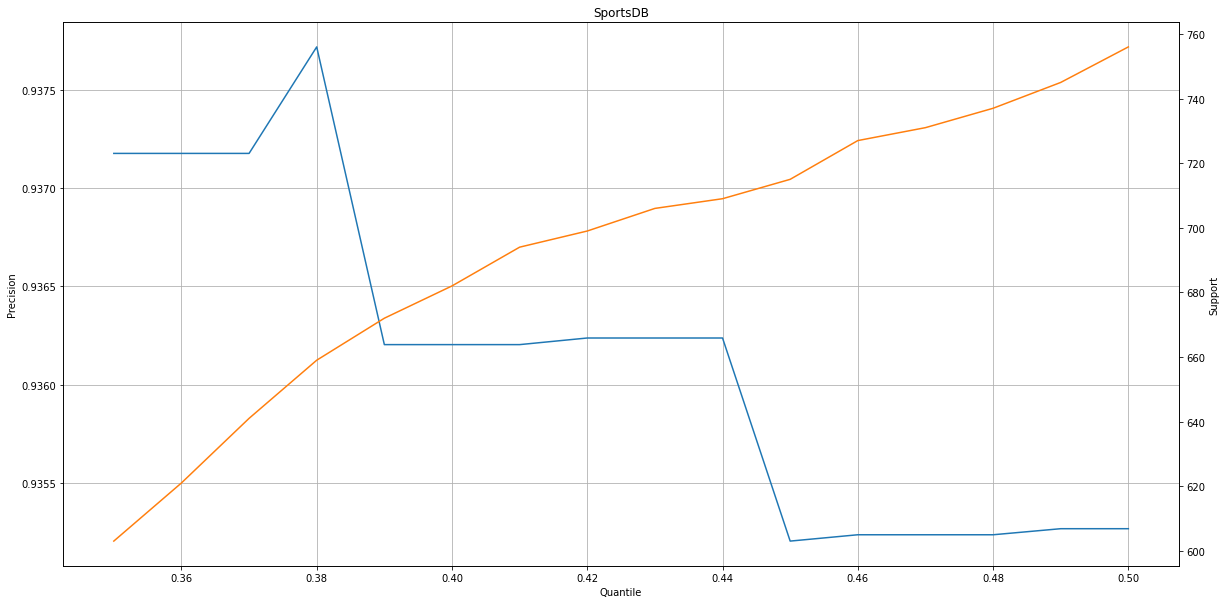

In [65]:
labeled_data_size = 5
table_frac = None


total_numeric_cols_to_predict = 0
EMD_threshold_factor = 0.01


precisions = []
supports = []
x_values = []

for emd_quantile in np.arange(0.35,0.5,0.01):
    emds = []
    true_types = []
    predicted_types = []
    #emd_quantile = 0.45
    for index, rank_file in enumerate(glob.glob(join("normal_EMD", "results", "sportsDB", f"*appr1_{table_frac}_{labeled_data_size}_absolute_20.1_2.csv"))):
        df_ranked_EMD = pd.read_csv(rank_file)
        if len(df_ranked_EMD) > 0: 
            emds.append(df_ranked_EMD["EMD"].tolist()[0])

    EMD_threshold_factor = np.quantile(emds, emd_quantile)

    results_normal_emd = []
    for index, rank_file in enumerate(glob.glob(join("normal_EMD", "results", "sportsDB", f"*appr1_{table_frac}_{labeled_data_size}_absolute_20.1_2.csv"))):
        # if index > 1:
        #     break
        total_numeric_cols_to_predict += 1 
        df_ranked_EMD = pd.read_csv(rank_file)
        # if df_ranked_EMD.iloc[0]["real_semantic_type"] in ["latitude", "longitude"]:
        #     continue
        if len(df_ranked_EMD) == 0:
            continue
        # EMD Threshold check
        if df_ranked_EMD.iloc[0]["EMD"] >= (df_ranked_EMD.iloc[0]["std"] * EMD_threshold_factor):
            #pass
            continue
        if len(df_ranked_EMD) < 2:
            true_types.append(df_ranked_EMD.iloc[0]["real_semantic_type"])
            predicted_types.append(df_ranked_EMD.iloc[0]["semantic_type"])
            results_normal_emd.append(df_ranked_EMD.iloc[0].values.tolist())
        if len(df_ranked_EMD) > 2:
            if (df_ranked_EMD.iloc[0]["EMD"] == df_ranked_EMD.iloc[1]["EMD"]) & (df_ranked_EMD.iloc[0]["semantic_type"] != df_ranked_EMD.iloc[1]["semantic_type"]):
                print("Equal EMD 1 & 2 but different types")
                #pass
                continue
            true_types.append(df_ranked_EMD.iloc[0]["real_semantic_type"])
            predicted_types.append(df_ranked_EMD.iloc[0]["semantic_type"])
            results_normal_emd.append(df_ranked_EMD.iloc[0].values.tolist())
    # print(total_numeric_cols_to_predict)
    # print(len(true_types))

    #### semantic type mapping
    true_types = [semantic_type_mapping_sportsDB[s_type] if s_type in list(semantic_type_mapping_sportsDB.keys()) else s_type for s_type in true_types]
    predicted_types = [semantic_type_mapping_sportsDB[s_type] if s_type in list(semantic_type_mapping_sportsDB.keys()) else s_type for s_type in predicted_types]
    
    try:
        class_report = classification_report(true_types, predicted_types)
        class_report_dict = classification_report(true_types, predicted_types, output_dict=True)
    except:
        precisions.append(0)
        supports.append(0)
        x_values.append(emd_quantile)

    results_normal_emd = pd.DataFrame(results_normal_emd, columns=['unlabeled_col', 'real_semantic_type', 'labeled_col', 'semantic_type','EMD', 'mean', 'std'])
    results_normal_emd = results_normal_emd[results_normal_emd["real_semantic_type"] == results_normal_emd["semantic_type"]]


    precisions.append(class_report_dict["macro avg"]["precision"])
    supports.append(class_report_dict["macro avg"]["support"])
    x_values.append(emd_quantile)


fig, ax1 = plt.subplots(figsize=(20,10))

ax2 = ax1.twinx()
ax1.plot(x_values, precisions, color="C0")
ax2.plot(x_values, supports, color="C1")

ax1.set_xlabel('Quantile')
ax1.set_ylabel('Precision')
ax2.set_ylabel('Support')
ax1.grid()

plt.title("SportsDB")

plt.show()

In [46]:
df_emds_quantiles = pd.DataFrame({"quantile_values": np.arange(0.3,0.5,0.01)})
df_emds_quantiles["public_bi"] = df_emds_quantiles.apply(lambda row: np.quantile(emds_public_bi, row["quantile_values"]), axis=1)
df_emds_quantiles["sports_db"] = df_emds_quantiles.apply(lambda row: np.quantile(emds_sportsDB, row["quantile_values"]), axis=1)

plt.figure(figsize=(20,10))

plt.plot(df_emds_quantiles["quantile_values"], df_emds_quantiles["public_bi"], label="Public BI Num")
plt.axhline(y=0.01, color="C0")
plt.plot(df_emds_quantiles["quantile_values"], df_emds_quantiles["sports_db"], label="SportsDB")
plt.axhline(y=0.1, color="C1")

plt.xticks(np.arange(0.3,0.5,0.02))
plt.yticks(np.arange(0,0.12,0.01))
plt.xlabel("Quantile")
plt.ylabel("Quantile-Value")
plt.title("Quantiles and ther values of the EMDs")
plt.legend()
plt.show()

In [30]:
df_emds_quantiles

,quantile_values,public_bi,sports_db
0,0.00,0.000000e+00,0.001297
1,0.01,0.000000e+00,0.006303
2,0.02,0.000000e+00,0.007618
3,0.03,0.000000e+00,0.008401
4,0.04,0.000000e+00,0.009057
5,0.05,0.000000e+00,0.009780
6,0.06,0.000000e+00,0.010273
7,0.07,0.000000e+00,0.011151
8,0.08,0.000000e+00,0.011406
9,0.09,0.000000e+00,0.011760
